## 1. Crime Trends & Patterns
- How has the total number of crimes changed over the years?
- Which major crime indicator (MCI_CATEGORY) is most common?
- Is there seanonality to crime? Are certain months (OCC_MONTH) or days of the week (OCC_DOW) more dangerous?
- WHat time of day (OCC_HOUR) do most crimes occur?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
color_palette = ['#fa5000', '#96c8c8', '#ffbe00', '#784b96', '#afbe5a', '#fa0000', '#fa78b4', '#005a5a']

In [3]:
policeData = pd.read_csv('Major_Crime_Indicators_Open_Data_-3805566126367379926.csv')
print(policeData.head())

   OBJECTID EVENT_UNIQUE_ID          REPORT_DATE             OCC_DATE  \
0         1  GO-20141261013  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
1         2  GO-20141261561  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
2         3  GO-20141262377  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
3         4  GO-20141262553  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
4         5  GO-20141263115  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   

   REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  \
0         2014      January           1           1  Wednesday             4   
1         2014      January           1           1  Wednesday             8   
2         2014      January           1           1  Wednesday            12   
3         2014      January           1           1  Wednesday            14   
4         2014      January           1           1  Wednesday            16   

   ...              OFFENCE MCI_CATEGORY  HOOD_158  \
0  ...              Assaul

In [4]:
policeData.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [5]:
policeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452949 entries, 0 to 452948
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           452949 non-null  int64  
 1   EVENT_UNIQUE_ID    452949 non-null  object 
 2   REPORT_DATE        452949 non-null  object 
 3   OCC_DATE           452949 non-null  object 
 4   REPORT_YEAR        452949 non-null  int64  
 5   REPORT_MONTH       452949 non-null  object 
 6   REPORT_DAY         452949 non-null  int64  
 7   REPORT_DOY         452949 non-null  int64  
 8   REPORT_DOW         452949 non-null  object 
 9   REPORT_HOUR        452949 non-null  int64  
 10  OCC_YEAR           452798 non-null  float64
 11  OCC_MONTH          452798 non-null  object 
 12  OCC_DAY            452798 non-null  float64
 13  OCC_DOY            452798 non-null  float64
 14  OCC_DOW            452798 non-null  object 
 15  OCC_HOUR           452949 non-null  int64  
 16  DI

In [9]:
policeData.NEIGHBOURHOOD_140.unique()

array(['Downsview-Roding-CFB (26)', 'North Riverdale (68)',
       'Wychwood (94)', 'Clairlea-Birchmount (120)', 'Taylor-Massey (61)',
       'Kensington-Chinatown (78)', 'South Parkdale (85)',
       'Yonge-Eglinton (100)', 'Morningside (135)',
       'Islington-City Centre West (14)', 'York University Heights (27)',
       'Bay Street Corridor (76)', 'Annex (95)',
       'Waterfront Communities-The Island (77)', 'Ionview (125)',
       'Weston-Pelham Park (91)', 'Rosedale-Moore Park (98)',
       'West Hill (136)', 'Oakwood Village (107)',
       'Victoria Village (43)', "O'Connor-Parkview (54)",
       'Cliffcrest (123)', 'NSA', 'Oakridge (121)', 'Weston (113)',
       'Cabbagetown-South St.James Town (71)', 'Regent Park (72)',
       'Mount Dennis (115)', 'Hillcrest Village (48)',
       'Lansing-Westgate (38)', 'Trinity-Bellwoods (81)',
       'Blake-Jones (69)', 'South Riverdale (70)', 'Danforth (66)',
       'Dorset Park (126)', 'Lawrence Park North (105)',
       'Willowdale We

In [7]:
policeData.PREMISES_TYPE.value_counts()

PREMISES_TYPE
Outside        123398
Apartment      106167
Commercial      88822
House           81447
Other           27742
Transit         14216
Educational     11157
Name: count, dtype: int64

In [105]:
policeData.DIVISION.unique()

array(['D31', 'D55', 'D13', 'D41', 'D54', 'D14', 'D53', 'D43', 'D22',
       'D32', 'D52', 'D11', 'D33', 'NSA', 'D12', 'D51', 'D42', 'D23'],
      dtype=object)

In [106]:
policeData.LOCATION_TYPE.unique()

array(['Apartment (Rooming House, Condo)',
       'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)',
       'Single Home, House (Attach Garage, Cottage, Mobile)',
       'Retirement Home',
       'Streets, Roads, Highways (Bicycle Path, Private Road)',
       'Bar / Restaurant', 'Ttc Subway Train', 'Ttc Subway Station',
       'Parking Lots (Apt., Commercial Or Non-Commercial)',
       'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg',
       'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)',
       'Go Train', 'Gas Station (Self, Full, Attached Convenience)',
       'Open Areas (Lakes, Parks, Rivers)',
       "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)",
       'Schools During Supervised Activity', 'Convenience Stores',
       'Unknown', 'Jails / Detention Centres',
       'Bank And Other Financial Institutions (Money Mart, Tsx)',
       'Group Homes (Non-Profit, Halfway House, Social Agency)',


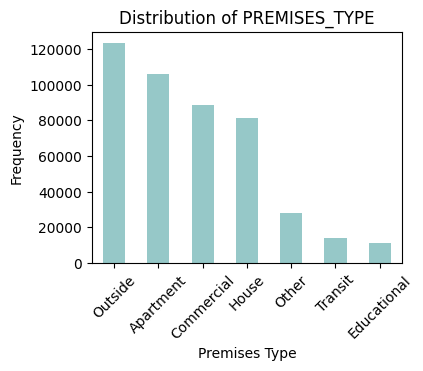

In [7]:
# graph of PREMISES_TYPE
plt.figure(figsize=(4,3))
policeData.PREMISES_TYPE.value_counts().plot(kind='bar', color=color_palette[1])
plt.title('Distribution of PREMISES_TYPE')
plt.xlabel('Premises Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 1). Crime trends over time

#### Year

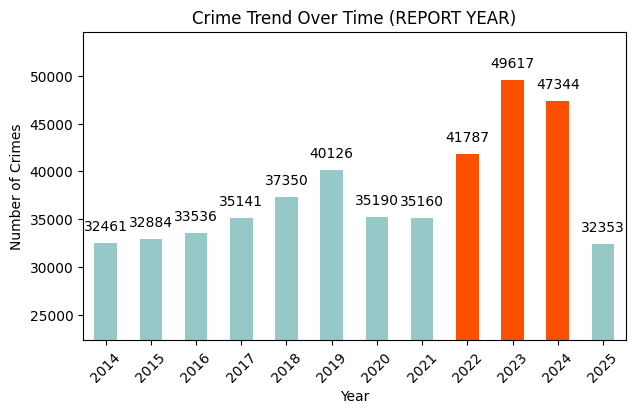

In [8]:
# crime trend over time (REPORT YEAR)
plt.figure(figsize=(7,4))
# use different color for top 3 years with highest crime rates
policeData.REPORT_YEAR.value_counts().sort_index().plot(kind='bar', color=[color_palette[0] if v in policeData.REPORT_YEAR.value_counts().nlargest(3).values else color_palette[1] for v in policeData.REPORT_YEAR.value_counts().sort_index()])
plt.title('Crime Trend Over Time (REPORT YEAR)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
# annotate bars with values
for i, v in enumerate(policeData.REPORT_YEAR.value_counts().sort_index()):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylim(policeData.REPORT_YEAR.value_counts().min() - 10000, policeData.REPORT_YEAR.value_counts().max() + 5000)
plt.show()

- lower crime rates in 2020 and 2021 potentially due to COVID
- crime rates jump back up in 2022, worse then previous years (2014-2019)

#### Month

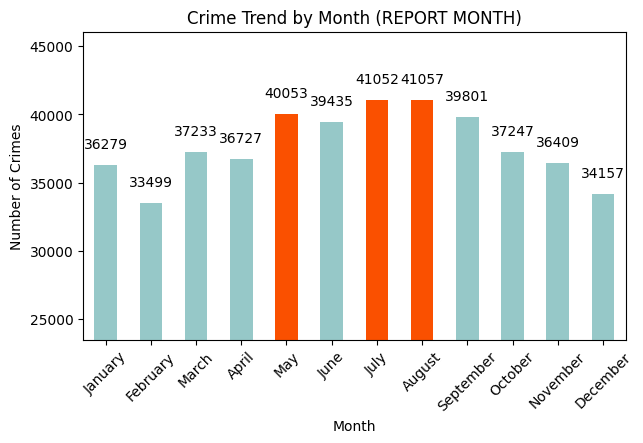

In [9]:
# crime trend REPORT_MONTH; fix month order
plt.figure(figsize=(7,4))

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the value counts to follow chronological order
month_counts = policeData.REPORT_MONTH.value_counts().reindex(month_order)
# use different color for top 3 months with highest crime rates
month_counts.plot(kind='bar', color=[color_palette[0] if v in month_counts.nlargest(3).values else color_palette[1] for v in month_counts])
plt.title('Crime Trend by Month (REPORT MONTH)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# annotate bars with values
for i, v in enumerate(month_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.ylim(month_counts.min() - 10000, month_counts.max() + 5000)
plt.show()

- higher crime rates in summer months

#### Day of the week

In [10]:
policeData.REPORT_DOW.value_counts()

REPORT_DOW
Monday        67113
Friday        66475
Tuesday       65620
Wednesday     65450
Thursday      64817
Saturday      62324
Sunday        61150
Name: count, dtype: int64

In [11]:
policeData.REPORT_DOW.unique()
# empty strings from REPORT_DOW are causing reindexing issues

array(['Wednesday ', 'Thursday  ', 'Friday    ', 'Saturday  ',
       'Sunday    ', 'Monday    ', 'Tuesday   '], dtype=object)

In [12]:
# remove empty strings from REPORT_DOW
policeData.REPORT_DOW = policeData.REPORT_DOW.str.strip()
policeData.REPORT_DOW.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

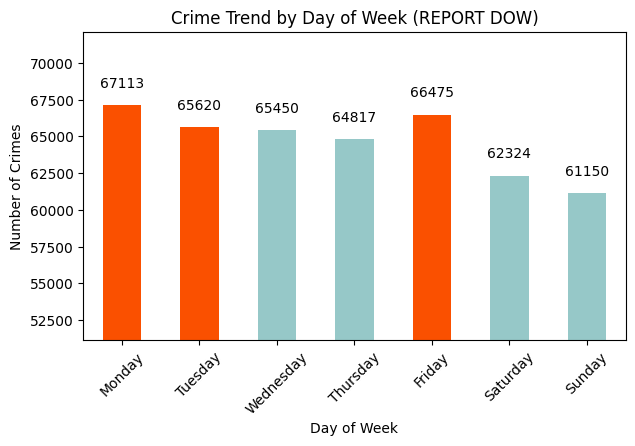

In [13]:
# crime pattern for REPORT_DOW
plt.figure(figsize=(7,4))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# reindex to ensure correct chronological order
dow_counts = policeData.REPORT_DOW.value_counts().reindex(weekday_order)
# use differenet color for top 3 days with highest crime rates
dow_counts.plot(kind='bar', color=[color_palette[0] if v in dow_counts.nlargest(3).values else color_palette[1] for v in dow_counts])
plt.title('Crime Trend by Day of Week (REPORT DOW)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')

# annotate bars with values
for i, v in enumerate(dow_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.ylim(dow_counts.min() - 10000, dow_counts.max() + 5000)
plt.show()

#### Hour

In [14]:
policeData.REPORT_HOUR.unique()

array([ 4,  8, 12, 14, 16, 18,  6, 21, 20,  7, 22,  1,  2,  0, 11, 15, 10,
        9,  3, 17,  5, 19, 23, 13])

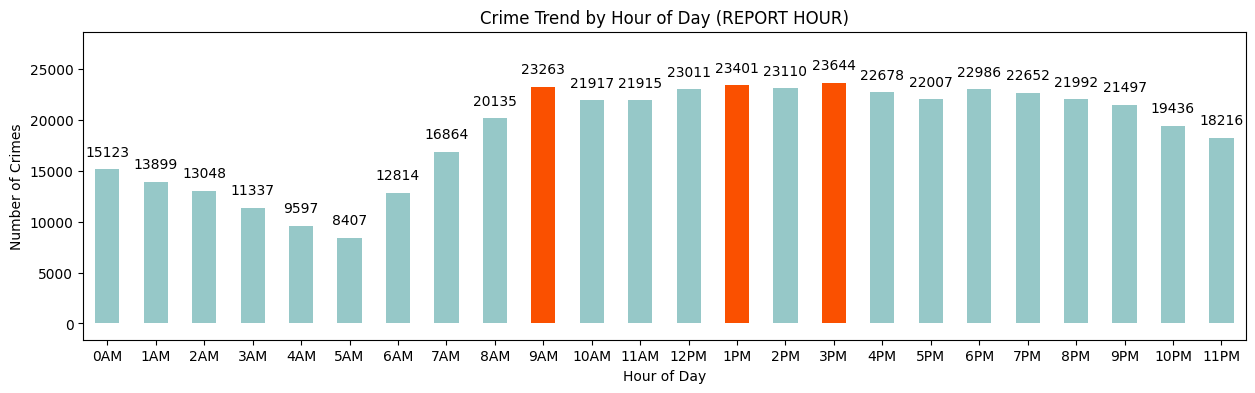

In [15]:
# crime rate by REPORT_HOUR
plt.figure(figsize=(15,4))
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# reindex to ensure correct chronological order
hour_counts = policeData.REPORT_HOUR.value_counts().reindex(hour_order)
# for counts > 23000, use color_palette[0]
hour_counts.plot(kind='bar', color=[color_palette[0] if v in hour_counts.nlargest(3).values else color_palette[1] for v in hour_counts])
plt.title('Crime Trend by Hour of Day (REPORT HOUR)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
# annotate bars with values
for i, v in enumerate(hour_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
# x-axis label as 0AM, 1AM, ..., 11PM
plt.xticks(ticks=range(24), labels=[f'{h}AM' if h < 12 else (f'{h-12}PM' if h > 12 else '12PM') for h in range(24)])
plt.xticks(rotation=0)
plt.ylim(hour_counts.min() - 10000, hour_counts.max() + 5000)
plt.show()

### 2) Major Crime Indicator

In [16]:
policeData.MCI_CATEGORY.value_counts()

MCI_CATEGORY
Assault            242671
Break and Enter     81551
Auto Theft          73739
Robbery             39117
Theft Over          15871
Name: count, dtype: int64

In [103]:
policeData.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [102]:
policeData.OFFENCE.unique()

array(['Assault', 'Assault With Weapon', 'Assault Bodily Harm',
       'Robbery With Weapon', 'B&E', "B&E W'Intent",
       'Theft Of Motor Vehicle', 'Theft Over', 'Robbery - Purse Snatch',
       'Assault Peace Officer', 'Administering Noxious Thing',
       'Aggravated Assault', 'Discharge Firearm With Intent',
       'Unlawfully In Dwelling-House', 'Robbery - Mugging',
       'Robbery - Swarming', 'Robbery - Business',
       'Crim Negligence Bodily Harm', 'Robbery - Other',
       'Theft From Motor Vehicle Over', 'Assault - Force/Thrt/Impede',
       'Robbery - Financial Institute', 'Assault - Resist/ Prevent Seiz',
       'Pointing A Firearm', 'Robbery - Armoured Car',
       'Discharge Firearm - Recklessly', 'Theft From Mail / Bag / Key',
       'Assault Peace Officer Wpn/Cbh', 'Robbery - Vehicle Jacking',
       'Robbery - Taxi', 'Robbery - Home Invasion', 'B&E Out',
       'Theft Over - Shoplifting', 'Unlawfully Causing Bodily Harm',
       'Use Firearm / Immit Commit Off', 'Th

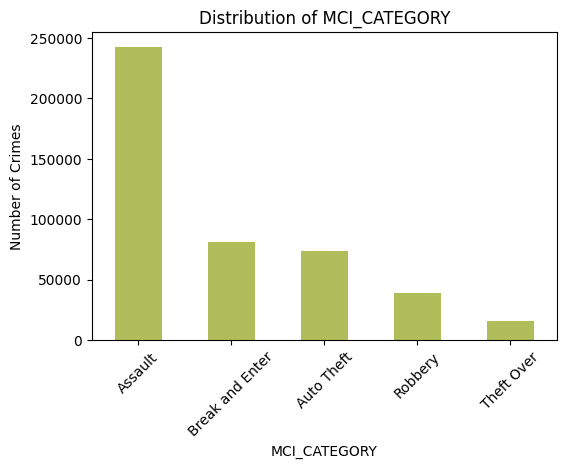

In [17]:
# MCI_CATEGORY distribution
plt.figure(figsize=(6,4))
policeData.MCI_CATEGORY.value_counts().plot(kind='bar', color=color_palette[4])
plt.title('Distribution of MCI_CATEGORY')
plt.xlabel('MCI_CATEGORY')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

C:\Users\yiyiw\AppData\Local\Temp\ipykernel_19552\95259942.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=policeData, x='REPORT_HOUR', hue='MCI_CATEGORY', palette=color_palette)


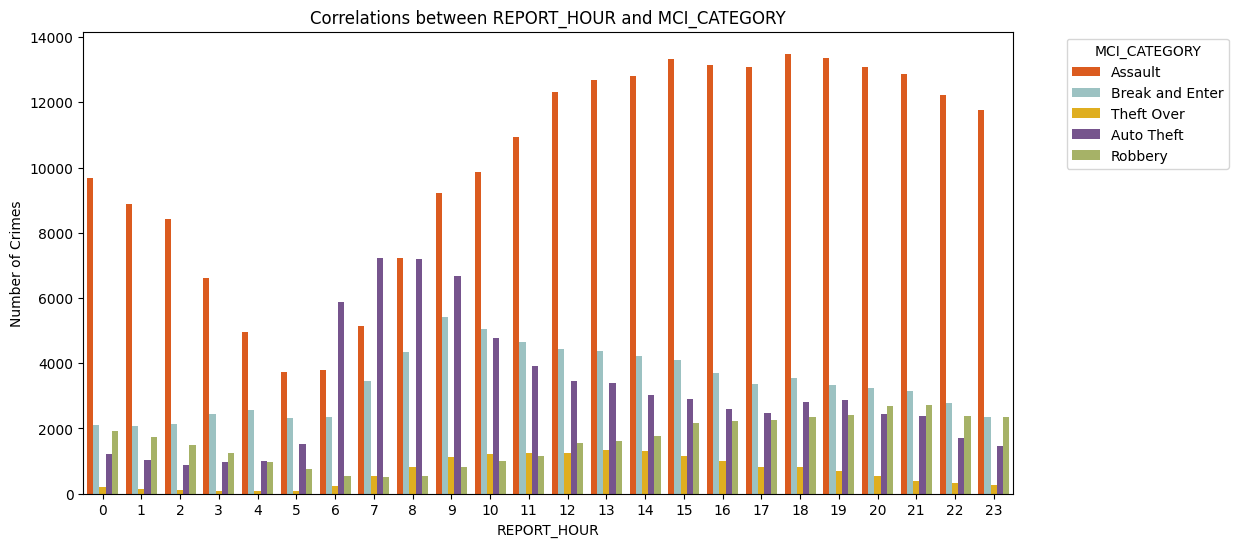

In [18]:
# explore corralations between REPORT_HOUR and MCI_CATEGORY
plt.figure(figsize=(12,6))
sns.countplot(data=policeData, x='REPORT_HOUR', hue='MCI_CATEGORY', palette=color_palette)
plt.title('Correlations between REPORT_HOUR and MCI_CATEGORY')
plt.xlabel('REPORT_HOUR')
plt.ylabel('Number of Crimes')
plt.legend(title='MCI_CATEGORY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\yiyiw\AppData\Local\Temp\ipykernel_19552\172696693.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.lineplot(data=policeData.groupby(['REPORT_YEAR', 'MCI_CATEGORY']).size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', hue='MCI_CATEGORY', marker='o', palette=color_palette)


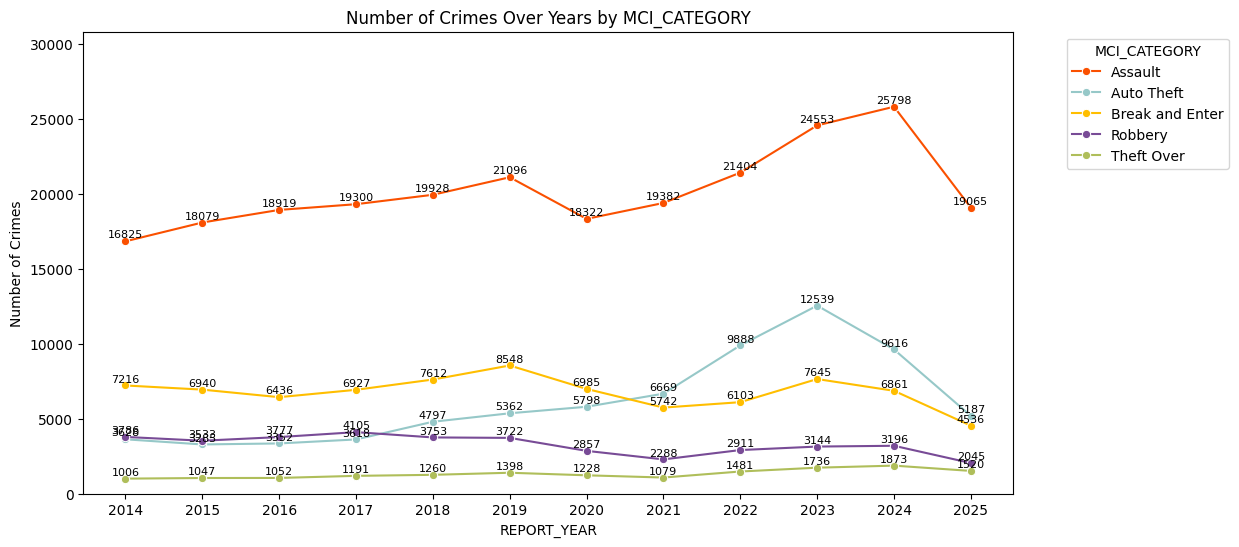

In [93]:
# line plot for all MCI_CATEGORY by REPORT_YEAR
plt.figure(figsize=(12,6))
sns.lineplot(data=policeData.groupby(['REPORT_YEAR', 'MCI_CATEGORY']).size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', hue='MCI_CATEGORY', marker='o', palette=color_palette)
plt.title('Number of Crimes Over Years by MCI_CATEGORY')
# annotate points with values
for line in plt.gca().lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y + 100, str(int(y)), ha='center', va='bottom', fontsize=8)
plt.xlabel('REPORT_YEAR')
plt.ylabel('Number of Crimes')
# show all yeears on x-axis
plt.xticks(policeData.REPORT_YEAR.unique())
plt.legend(title='MCI_CATEGORY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, policeData.groupby(['REPORT_YEAR', 'MCI_CATEGORY']).size().max() + 5000)
plt.show()

#### Assault

##### - REPORT_YEAR

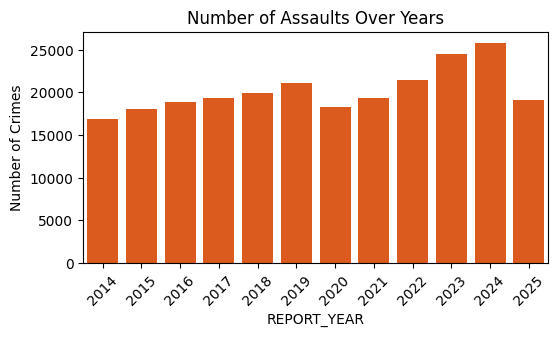

In [47]:
# explore corralations between REPORT_YEAR and MCI_CATEGORY = 'ASSAULT'
plt.figure(figsize=(6,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'], x='REPORT_YEAR', color=color_palette[0])
plt.title('Number of Assaults Over Years')
plt.xlabel('REPORT_YEAR')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

- highest number of assault in 2024
- 2025 still has 3 more months to come (OCT, NOV, DEC)

C:\Users\yiyiw\AppData\Local\Temp\ipykernel_19552\2929597659.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'][policeData['OFFENCE'].isin(top_offences)].groupby(['REPORT_YEAR', 'OFFENCE']).size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', hue='OFFENCE', marker='o', palette=color_palette)
C:\Users\yiyiw\AppData\Local\Temp\ipykernel_19552\2929597659.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.lineplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'][policeData['OFFENCE'].isin(top_offences)].groupby(['REPORT_YEAR', 'OFFENCE']).size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', hue='OFFENCE', marker='o', palette=color_palette)


Text(0.5, 1.0, 'Number of Assaults Over Years by OFFENCE')

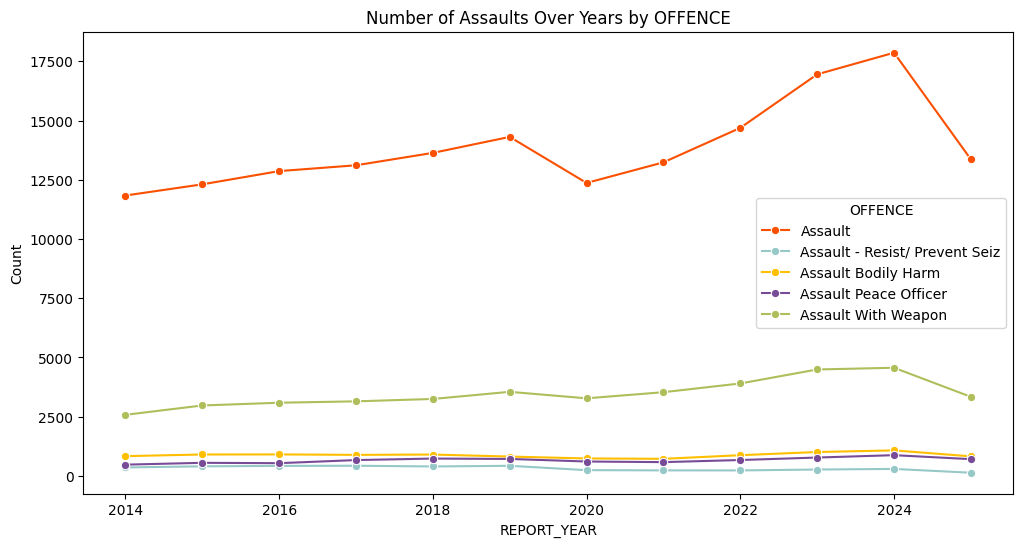

In [111]:
# line graph for top 5 Assault over years and color by OFFENCE
plt.figure(figsize=(12,6))
top_offences = policeData[policeData['MCI_CATEGORY'] == 'Assault'].groupby('OFFENCE').size().nlargest(5).index
sns.lineplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'][policeData['OFFENCE'].isin(top_offences)].groupby(['REPORT_YEAR', 'OFFENCE']).size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', hue='OFFENCE', marker='o', palette=color_palette)
plt.title('Number of Assaults Over Years by OFFENCE')

##### - REPORT_HOUR

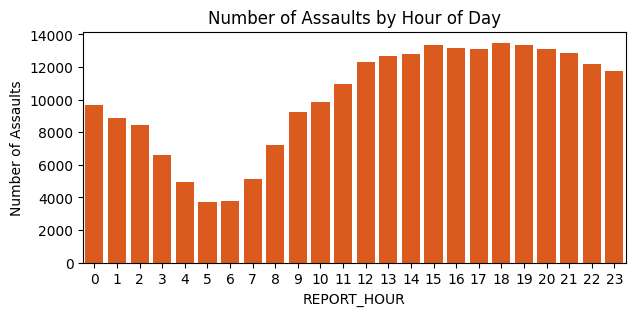

In [ ]:
# explore corralations between REPORT_HOUR and MCI_CATEGORY = 'ASSAULT'
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'], x='REPORT_HOUR', color=color_palette[0])
plt.title('Number of Assaults by Hour of Day')
plt.xlabel('REPORT_HOUR')
plt.ylabel('Number of Assaults')
plt.show()

##### - REPORT_DOW

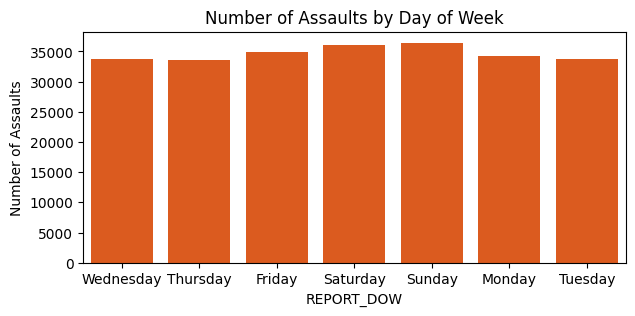

In [53]:
# explore corralations between REPORT_HOUR and MCI_CATEGORY = 'ASSAULT'
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Assault'], x='REPORT_DOW', color=color_palette[0])
plt.title('Number of Assaults by Day of Week')
plt.xlabel('REPORT_DOW')
plt.ylabel('Number of Assaults')
plt.show()

#### Robery

##### - REPORT_YEAR

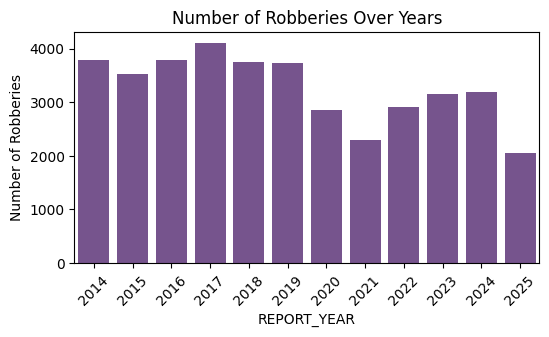

In [94]:
plt.figure(figsize=(6,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Robbery'], x='REPORT_YEAR', color=color_palette[3])
plt.title('Number of Robberies Over Years')
plt.xlabel('REPORT_YEAR')
plt.ylabel('Number of Robberies')
plt.xticks(rotation=45)
plt.show()

##### - REPORT_HOUR

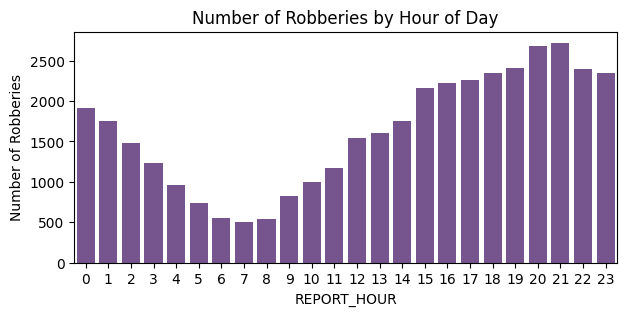

In [95]:
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Robbery'], x='REPORT_HOUR', color=color_palette[3])
plt.title('Number of Robberies by Hour of Day')
plt.xlabel('REPORT_HOUR')
plt.ylabel('Number of Robberies')
plt.show()

##### - REPORT_DOW

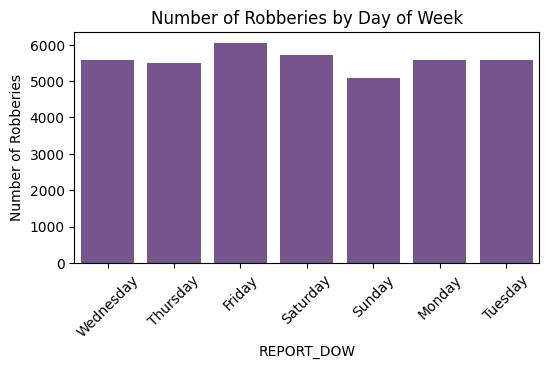

In [96]:
plt.figure(figsize=(6,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Robbery'], x='REPORT_DOW', color=color_palette[3])
plt.title('Number of Robberies by Day of Week')
plt.xlabel('REPORT_DOW')
plt.ylabel('Number of Robberies')
plt.xticks(rotation=45)
plt.show()

#### Break and Enter

##### - REPORT_YEAR

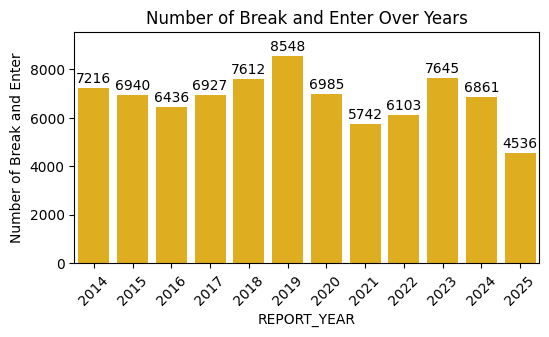

In [97]:
plt.figure(figsize=(6,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Break and Enter'], x='REPORT_YEAR', color=color_palette[2])
plt.title('Number of Break and Enter Over Years')
plt.xlabel('REPORT_YEAR')
plt.ylabel('Number of Break and Enter')
# annotate bars with values
for i, v in enumerate(policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_YEAR'].value_counts().sort_index()):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylim(0, policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_YEAR'].value_counts().max() + 1000)
plt.show()

- work from home might contribute to stable number of break and enter -> not increasing too much after the pandemic

Text(0.5, 1.0, 'Number of Break and Enter Over Years')

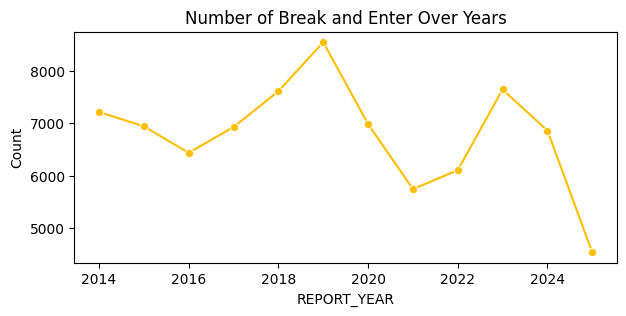

In [98]:
# line graph of break and enter by year
plt.figure(figsize=(7,3))
sns.lineplot(data=policeData[policeData['MCI_CATEGORY'] == 'Break and Enter'].groupby('REPORT_YEAR').size().reset_index(name='Count'), x='REPORT_YEAR', y='Count', marker='o', color=color_palette[2])
plt.title('Number of Break and Enter Over Years')

##### - REPORT_MONTH

In [76]:
policeData.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

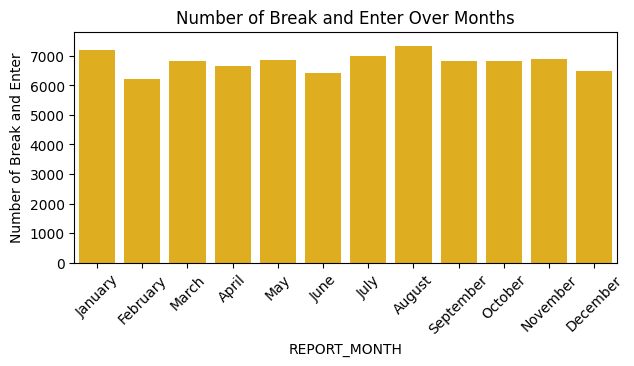

In [99]:
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Break and Enter'], x='REPORT_MONTH', color=color_palette[2])
plt.title('Number of Break and Enter Over Months')
plt.xlabel('REPORT_MONTH')
plt.ylabel('Number of Break and Enter')
plt.xticks(rotation=45)
plt.ylim(0, policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_MONTH'].value_counts().max() + 500)
plt.show()

##### - REPORT_HOUR

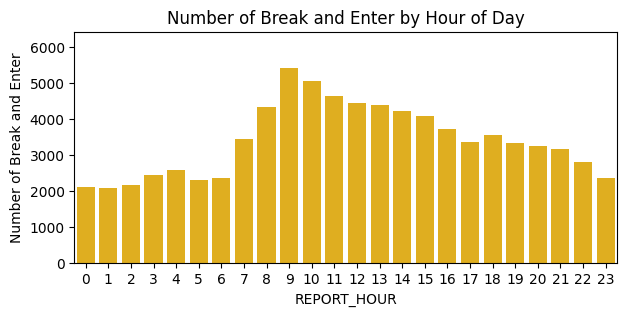

In [100]:
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Break and Enter'], x='REPORT_HOUR', color=color_palette[2])
plt.title('Number of Break and Enter by Hour of Day')
plt.xlabel('REPORT_HOUR')
plt.ylabel('Number of Break and Enter')
# annotate bars with values
# for i, v in enumerate(policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_HOUR'].value_counts().sort_index()):
#     plt.text(i, v + 100, str(v), ha='center', va='bottom')
plt.ylim(0, policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_HOUR'].value_counts().max() + 1000)
plt.show()

- more break and enter when it's work hours and people leave home for work

##### - REPORT_DOW

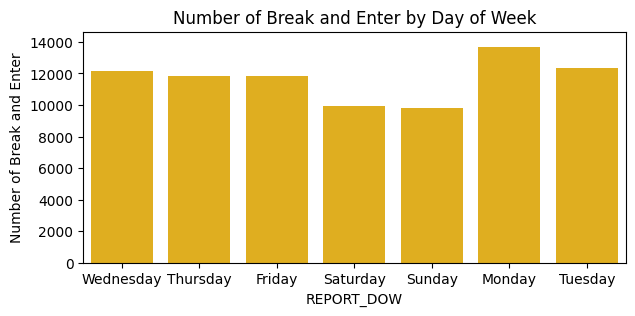

In [101]:
plt.figure(figsize=(7,3))
sns.countplot(data=policeData[policeData['MCI_CATEGORY'] == 'Break and Enter'], x='REPORT_DOW', color=color_palette[2])
plt.title('Number of Break and Enter by Day of Week')
plt.xlabel('REPORT_DOW')
plt.ylabel('Number of Break and Enter')
plt.ylim(0, policeData[policeData['MCI_CATEGORY'] == 'Break and Enter']['REPORT_DOW'].value_counts().max() + 1000)
plt.show()

In [ ]:
policeData.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# Create the treemap
category_counts = policeData.groupby(['MCI_CATEGORY', 'OFFENCE']).size().reset_index(name='count')
fig = px.treemap(category_counts, 
                 path=['MCI_CATEGORY', 'OFFENCE'], 
                 values='count',
                 title='Crime Categories Hierarchy: MCI_CATEGORY -> OFFENCE')
fig.show()